In [1]:
from espn_api.football import League, Matchup, Player, BoxPlayer, Team
from espn_api.football import box_score
from espn_api.football import helper
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
pd.read_csv("/Users/benstager/Desktop/fantasy/data/SPR.csv")

,Week,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12
0,1,Zilwaukee Chudwick,Dee Wuffest,LeFantasy Fo,Team Rock,That was the dagger,Small PP Team,Tittsburgh Feelers,Otay Myman,Mat Noment Oens,PBR Kayla,Swordless Mimetown,Straw Hat


In [43]:
import numpy as np

np.setdiff1d(['home', 'away'], 'away')[0]

'home'

In [2]:
league_id = 1957747319
year = 2024
espn_s2 = "AEBb%2FDwONHQyMedrYsdD%2FErgg4sIQEhuTg7HnQfw7cAswgeY8hvRVZM3bBS7Kn3lqzpR7fANyNnx3gSb0cKpo078OukVEfEo4zHTtIAp4BPh7KkrKU0%2BxwT%2FWx0505bJz95b4C6OEA6o3AuzDrcEnhUS0X6dC%2B3fGbzoNgAjZxP5BiLSPgu5tYn%2BWhXwqw9ajsxxMIIIOFvAhSv%2BQOXnHpd8rG%2FmPKR3faPQlaoNs3aiLWdv%2B63EiYIzCeC%2FzeHcq8Fhhtbg27xT4%2FyLiMeGCAllTFia6KLg9X7R58tbGc7QbQ%3D%3D"
swid = "{FBA603CA-5829-4581-A603-CA5829E581F0}"

# create League object
league = League(
    league_id=league_id,
    year=year,
    espn_s2=espn_s2,
    swid=swid
)

# Get user scores

In [41]:
#def get 

league.box_scores(week=1)[0].home_allowed

AttributeError: 'BoxScore' object has no attribute 'home_allowed'

# Get user totals, player by player, week by week

In [25]:
def get_total_scoring_by_team(year):
    league_id = 1957747319
    espn_s2 = "AEBb%2FDwONHQyMedrYsdD%2FErgg4sIQEhuTg7HnQfw7cAswgeY8hvRVZM3bBS7Kn3lqzpR7fANyNnx3gSb0cKpo078OukVEfEo4zHTtIAp4BPh7KkrKU0%2BxwT%2FWx0505bJz95b4C6OEA6o3AuzDrcEnhUS0X6dC%2B3fGbzoNgAjZxP5BiLSPgu5tYn%2BWhXwqw9ajsxxMIIIOFvAhSv%2BQOXnHpd8rG%2FmPKR3faPQlaoNs3aiLWdv%2B63EiYIzCeC%2FzeHcq8Fhhtbg27xT4%2FyLiMeGCAllTFia6KLg9X7R58tbGc7QbQ%3D%3D"
    swid = "{FBA603CA-5829-4581-A603-CA5829E581F0}"

    # create League object
    league = League(
        league_id=league_id,
        year=year,
        espn_s2=espn_s2,
        swid=swid
    )

    all_weeks = []
    for week in range(1, 15):
        frames = []
        for matchup in league.box_scores(week=week):
            matchups = []
            max_score = 0
            for str in ['home', 'away']:
                team = getattr(matchup, f"{str}_team")
                score = getattr(matchup, f"{str}_score")
                projected = getattr(matchup, f"{str}_projected")

                stats = pd.DataFrame({
                        f'year':year,
                        f'week':week,
                        f'{str}_team':team.team_name,
                        f'{str}_score':score,
                        f'{str}_projected':projected
                }, index=[0])   

                if score > max_score:
                    winner = team
                    max_score = score

                matchups.append(stats)

            merged = pd.merge(left=matchups[0], right=matchups[1], on=['year', 'week'])     
            merged['winner'] = winner
            
            frames.append(merged)

        all_weeks.append(pd.concat(frames))
    
    return pd.concat(all_weeks)

In [26]:
x = get_total_scoring_by_team(year=2023)

In [216]:
[i.slot_position for i in league.box_scores(week=5)[0].home_lineup[

['RB',
 'WR',
 'WR',
 'RB',
 'WR',
 'TE',
 'D/ST',
 'WR',
 'TE',
 'WR',
 'QB',
 'RB',
 'TE',
 'RB',
 'WR',
 'K',
 'D/ST']

In [221]:
players

['CeeDee Lamb',
 'Brandon Aiyuk',
 "D'Andre Swift",
 'Dak Prescott',
 'Javonte Williams',
 'Nick Chubb',
 'Jameson Williams',
 'Kirk Cousins',
 'Isaiah Likely',
 'George Pickens',
 'Rachaad White',
 'Jordan Mason',
 'Chris Boswell',
 'Tucker Kraft',
 'Tank Bigsby',
 'Packers D/ST',
 'Colts D/ST']

In [227]:
getattr(league.box_scores(week=week)[0], f"{str}_lineup")[0].stats[5]['breakdown']

{'rushingAttempts': 1.0,
 'rushingYards': 2.0,
 'rushingYardsPerAttempt': 2.0,
 'receivingReceptions': 5.0,
 'receivingYards': 62.0,
 '47': 12.0,
 '48': 6.0,
 '49': 3.0,
 '50': 2.0,
 '51': 1.0,
 '54': 1.0,
 'receivingTargets': 9.0,
 'receivingYardsAfterCatch': 21.0,
 'receivingYardsPerReception': 12.4,
 'teamWin': 1.0,
 '210': 1.0,
 '213': 2.0}

In [235]:
getattr(matchup, f"{str}_lineup")[0].stats[1].keys()

dict_keys(['projected_points', 'projected_breakdown', 'projected_avg_points', 'points', 'breakdown', 'avg_points'])

In [259]:
[(player, player.points)for player in getattr(matchup, f"{str}_lineup")]

[(Player(CeeDee Lamb, points:11.4, projected:20.93), 11.4),
 (Player(Brandon Aiyuk, points:22.7, projected:13.83), 22.7),
 (Player(D'Andre Swift, points:20.0, projected:15.44), 20.0),
 (Player(Dak Prescott, points:16.38, projected:18.09), 16.38),
 (Player(Javonte Williams, points:16.1, projected:12.68), 16.1),
 (Player(Nick Chubb, points:0.0, projected:0.0), 0.0),
 (Player(Jameson Williams, points:0, projected:0.0), 0),
 (Player(Kirk Cousins, points:34.36, projected:15.53), 34.36),
 (Player(Isaiah Likely, points:16.3, projected:6.29), 16.3),
 (Player(George Pickens, points:5.6, projected:14.27), 5.6),
 (Player(Rachaad White, points:9.6, projected:12.12), 9.6),
 (Player(Jordan Mason, points:8.8, projected:18.24), 8.8),
 (Player(Chris Boswell, points:6.0, projected:8.3), 6.0),
 (Player(Tucker Kraft, points:24.8, projected:10.47), 24.8),
 (Player(Tank Bigsby, points:25.9, projected:3.71), 25.9),
 (Player(Packers D/ST, points:11.0, projected:4.45), 11.0),
 (Player(Colts D/ST, points:-4.0, 

In [245]:
[player.stats[week]['points'] for player in getattr(matchup, f"{str}_lineup")]

KeyError: 'points'

In [328]:
def pull_team_by_position_stats(year):
    league_id = 1957747319
    espn_s2 = "AEBb%2FDwONHQyMedrYsdD%2FErgg4sIQEhuTg7HnQfw7cAswgeY8hvRVZM3bBS7Kn3lqzpR7fANyNnx3gSb0cKpo078OukVEfEo4zHTtIAp4BPh7KkrKU0%2BxwT%2FWx0505bJz95b4C6OEA6o3AuzDrcEnhUS0X6dC%2B3fGbzoNgAjZxP5BiLSPgu5tYn%2BWhXwqw9ajsxxMIIIOFvAhSv%2BQOXnHpd8rG%2FmPKR3faPQlaoNs3aiLWdv%2B63EiYIzCeC%2FzeHcq8Fhhtbg27xT4%2FyLiMeGCAllTFia6KLg9X7R58tbGc7QbQ%3D%3D"
    swid = "{FBA603CA-5829-4581-A603-CA5829E581F0}"

    # create League object
    league = League(
        league_id=league_id,
        year=year,
        espn_s2=espn_s2,
        swid=swid
    )

    finals = []
    for week in range(1, 15):
        frames = []
        for matchup in league.box_scores(week=week):
            for str in ['home', 'away']:
                team = getattr(matchup, f"{str}_team")
                players = [player.name for player in getattr(matchup, f"{str}_lineup")]
                # actual_breakdown = [pd.DataFrame(player.stats['breakdown'] for player in getattr(matchup, f"{str}_lineup"))]
                # projected_breakdown = [pd.DataFrame(player.stats['projected_breakdown'] for player in getattr(matchup, f"{str}_lineup"))]
                player_scored = [player.points for player in getattr(matchup, f"{str}_lineup")]
                player_projected = [player.projected_points for player in getattr(matchup, f"{str}_lineup")]
                position = [player.position for player in getattr(matchup, f"{str}_lineup")]
                starter_nonstarter = [player.slot_position for player in getattr(matchup, f"{str}_lineup")]

                stats = pd.DataFrame({
                    'week':week,
                    'home_away':str,
                    'team':team.team_name,
                    'players':players,
                    'player_scored':player_scored,
                    'player_projected':player_projected,
                    'position':position,
                    'started_nonstarted':starter_nonstarter
                })
                frames.append(stats)
            finals.append(pd.concat(frames))

    stats_all = pd.concat(finals)
    stats_all['year'] = year

    name_map  = {
        "Calvin's Daddy":"Harry",
        "Dee Wuffest":"Jake",
        "Is this the dagger":"DC",
        "LeFantasy Football":"Ethan",
        "Mat Noment Oens":"Harry",
        "Mr. Strydom and Me":"Cawley",
        "Otay MyMan":"Cawley",
        "PBR Kayla":"Stager",
        "Small PP team":"Greenberg",
        "Straw Hat":"Cash",
        "Swordless Mimetown":"Hayden",
        "Team Miller":"Gavin",
        "Team Rock":"Calvin",
        "Tiitsburgh Feelers":"Gavin",
        "Zilwaukee Chudwick":"Chad",
        "That was the dagger":"DC"
    }

    stats_all['first_name'] = stats_all['team'].apply(lambda x: name_map[x.rstrip()])
    
    stats_all.loc[stats_all['started_nonstarted'] == 'RB/WR/TE', 'started_nonstarted'] = 'FLEX'

    return stats_all

In [ ]:
x = pull_team_by_position_stats(year=2024)

In [308]:
name_map  = {
    "Calvin's Daddy":"Harry",
    "Dee Wuffest":"Jake",
    "Is this the dagger":"DC",
    "LeFantasy Football":"Ethan",
    "Mat Noment Oens":"Harry",
    "Mr. Strydom and Me":"Cawley",
    "Otay MyMan":"Cawley",
    "PBR Kayla":"Stager",
    "Small PP team":"Greenberg",
    "Straw Hat":"Cash",
    "Swordless Mimetown":"Hayden",
    "Team Miller":"Gavin",
    "Team Rock":"Calvin",
    "Tiitsburgh Feelers":"Gavin",
    "Zilwaukee Chudwick":"Chad",
    "That was the dagger":"DC"
}
stats_all['first_name'] = stats_all['team'].apply(lambda x: name_map[x.rstrip()])

In [309]:
averages = stats_all.groupby(['first_name', 'started_nonstarted'])['player_scored'].mean().reset_index()

In [318]:
rb = averages[averages['started_nonstarted'] == 'RB'].sort_values('player_scored',ascending=False)
wr = averages[averages['started_nonstarted'] == 'WR'].sort_values('player_scored',ascending=False)

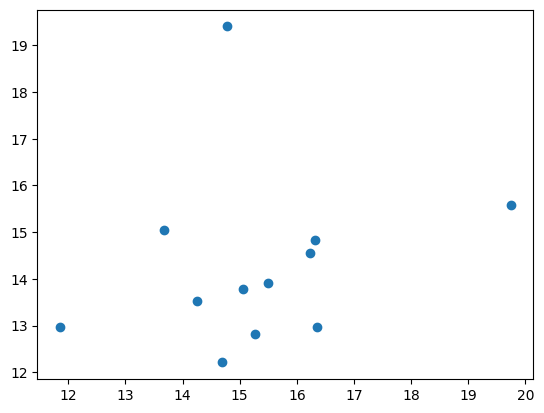

In [321]:
x = pd.merge(left=rb, right=wr, on='first_name', how='inner', suffixes=['RB', 'WR'])
plt.scatter(x['player_scoredRB'], x['player_scoredWR'])

# League instantiation

In [117]:
arr = []
for years in [2023, 2024]:
    league = League(
        league_id=league_id,
        year=years,
        espn_s2=espn_s2,
        swid=swid
    )
    for team in league.teams:
        name = team.owners[0]['lastName']
        arr.append([team.wins, team.losses, name])


In [75]:
import pandas as pd

pd.DataFrame(arr).groupby(2).agg({0:'sum', 1:'sum'})

,0,1
2,,
Adams,19,9
Benincasa,19,9
Bopple,14,14
Carroll,13,15
Cawley,8,20
Greenberg,17,11
Hamiltom,17,11
Miller,8,20
Nagusky,13,15


In [ ]:
all_time_WL = {}
for team in league.teams:
    name = team.owners[0]['lastName']
    wins = 0
    losses = 0

In [ ]:
league.box_scores(week=5)[0].home_team.

Team(Calvin's Daddy)

In [65]:
all_time_WL

{Team(Straw Hat): '18 - 10',
 Team(Dee Wuffest): '14 - 14',
 Team(Is this the dagger): '14 - 14',
 Team(Small PP team): '20 - 8',
 Team(PBR Kayla): '6 - 22',
 Team(Team Rock): '14 - 14',
 Team(Team Miller): '12 - 16',
 Team(Calvin's Daddy): '16 - 12',
 Team(LeFantasy Football): '18 - 10',
 Team(Mr. Strydom and Me ): '8 - 20',
 Team(Swordless Mimetown): '12 - 16',
 Team(Zilwaukee Chudwick): '16 - 12'}

In [63]:
all_time_WL

{Team(Straw Hat): '18 - 10',
 Team(Dee Wuffest): '14 - 14',
 Team(Is this the dagger): '14 - 14',
 Team(Small PP team): '20 - 8',
 Team(PBR Kayla): '6 - 22',
 Team(Team Rock): '14 - 14',
 Team(Team Miller): '12 - 16',
 Team(Calvin's Daddy): '16 - 12',
 Team(LeFantasy Football): '18 - 10',
 Team(Mr. Strydom and Me ): '8 - 20',
 Team(Swordless Mimetown): '12 - 16',
 Team(Zilwaukee Chudwick): '16 - 12'}

# Matchup iteration

In [29]:
league.top_scorer()

Team(Zilwaukee Chudwick)

In [102]:
league.

17

In [39]:
scoreboard = league.scoreboard(week=1)
for matchup in scoreboard:
    print(matchup.home_team.stats)
    print(f"{matchup.home_team.team_name} vs {matchup.away_team.team_name}")
    print(f"Score: {matchup.home_score} - {matchup.away_score}\n")

{'defensiveLessThan100YardsAllowed': 0.0, 'defensive100To199YardsAllowed': 0.0, 'defensive200To299YardsAllowed': 1.0, 'passingYards': 188.0, 'passingTouchdowns': 0.0, 'defensive350To399YardsAllowed': 0.0, 'defensive400To449YardsAllowed': 0.0, 'defensive450To499YardsAllowed': 0.0, '198': 1.0, 'defensive500To549YardsAllowed': 0.0, 'lostFumbles': 0.0, 'defensive550PlusYardsAllowed': 0.0, 'madeFieldGoalsFrom60Plus': 0.0, 'madeFieldGoalsFrom40To49': 0.0, 'defensive2PtReturns': 0.0, 'madeFieldGoalsFromUnder40': 2.0, '209': 0.0, 'passing2PtConversions': 0.0, 'passingInterceptions': 0.0, 'missedFieldGoals': 0.0, 'madeExtraPoints': 0.0, 'rushingYards': 137.0, 'rushingTouchdowns': 1.0, 'defensive0PointsAllowed': 0.0, 'rushing2PtConversions': 0.0, 'defensive1To6PointsAllowed': 0.0, 'defensive7To13PointsAllowed': 0.0, 'defensive14To17PointsAllowed': 0.0, 'defensiveBlockedKickForTouchdowns': 0.0, 'defensiveInterceptions': 0.0, 'defensiveFumbles': 0.0, 'defensiveBlockedKicks': 0.0, 'defensiveSafetie

In [50]:
league.scoreboard(week=15)

[]

In [24]:
matchup.home_team.

Team(Team Rock)

In [19]:
pd.DataFrame(matchup.home_team.stats, index=[0])

,defensiveLessThan100YardsAllowed,defensive100To199YardsAllowed,defensive200To299YardsAllowed,passingYards,passingTouchdowns,defensive350To399YardsAllowed,defensive400To449YardsAllowed,defensive450To499YardsAllowed,198,defensive500To549YardsAllowed,...,interceptionReturnTouchdowns,fumbleReturnTouchdowns,receivingYards,receivingTouchdowns,receiving2PtConversions,receivingReceptions,defensive28To34PointsAllowed,defensive35To45PointsAllowed,defensive45PlusPointsAllowed,fumbleRecoveredForTD
0,0.0,0.0,0.0,163.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,438.0,1.0,0.0,28.0,0.0,0.0,0.0,0.0


In [23]:
for team in league.teams:
    print(f"\n{team.team_name}'s roster:")
    for player in team.roster:
        print(player.name, "-", player.position, player.proTeam)


Straw Hat's roster:
Breece Hall - RB NYJ
Michael Pittman Jr. - WR IND
Mike Evans - WR TB
Jaylen Waddle - WR MIA
David Montgomery - RB DET
Joe Burrow - QB CIN
Kyle Pitts - TE ATL
Jordan Addison - WR MIN
Ladd McConkey - WR LAC
Matthew Stafford - QB LAR
Broncos D/ST - D/ST DEN
Mike Gesicki - TE CIN
Isaiah Likely - TE BAL
Chargers D/ST - D/ST LAC
Jake Elliott - K PHI
Patrick Taylor Jr. - RB SF

Dee Wuffest's roster:
Jonathan Taylor - RB IND
Jahmyr Gibbs - RB DET
Drake London - WR ATL
Jalen Hurts - QB PHI
Amari Cooper - WR BUF
Jake Ferguson - TE DAL
Tyler Allgeier - RB ATL
Baker Mayfield - QB TB
Romeo Doubs - WR GB
Hunter Henry - TE NE
Andrei Iosivas - WR CIN
Xavier Legette - WR CAR
Rashod Bateman - WR BAL
Zach Charbonnet - RB SEA
Wil Lutz - K DEN
Jets D/ST - D/ST NYJ

Is this the dagger's roster:
Amon-Ra St. Brown - WR DET
Kyren Williams - RB LAR
Nico Collins - WR HOU
Kenneth Walker III - RB SEA
Trey McBride - TE ARI
Jayden Reed - WR GB
Brock Purdy - QB SF
Chase McLaughlin - K TB
Tyrone T

# Create function to get all weekly stats for each team

In [179]:
def get_week_stats(year):
    league_id = 1957747319
    espn_s2 = "AEBb%2FDwONHQyMedrYsdD%2FErgg4sIQEhuTg7HnQfw7cAswgeY8hvRVZM3bBS7Kn3lqzpR7fANyNnx3gSb0cKpo078OukVEfEo4zHTtIAp4BPh7KkrKU0%2BxwT%2FWx0505bJz95b4C6OEA6o3AuzDrcEnhUS0X6dC%2B3fGbzoNgAjZxP5BiLSPgu5tYn%2BWhXwqw9ajsxxMIIIOFvAhSv%2BQOXnHpd8rG%2FmPKR3faPQlaoNs3aiLWdv%2B63EiYIzCeC%2FzeHcq8Fhhtbg27xT4%2FyLiMeGCAllTFia6KLg9X7R58tbGc7QbQ%3D%3D"
    swid = "{FBA603CA-5829-4581-A603-CA5829E581F0}"

    # create League object
    league = League(
        league_id=league_id,
        year=year,
        espn_s2=espn_s2,
        swid=swid
    )

    all_weeks = []

    for week in range(15):
        scoreboard = league.scoreboard(week=week)
        if scoreboard != []:
            for matchup in scoreboard:
                home_team_stats = pd.DataFrame(matchup.home_team.stats, index=[0]) / 14
                home_team_stats['Team Name'] = matchup.home_team.team_name
                away_team_stats = pd.DataFrame(matchup.away_team.stats, index=[0]) / 14
                away_team_stats['Team Name'] = matchup.away_team.team_name
            
                final = pd.concat([home_team_stats, away_team_stats])
                final['week_year'] = f"{year}_WEEK{week}"
                all_weeks.append(final)
    
    return pd.concat(all_weeks)

In [199]:
raw_stats = pd.concat([get_week_stats(year) for year in [2023, 2024, 2025]])

In [200]:
name_map  = {
    "Calvin's Daddy":"Harry",
    "Dee Wuffest":"Jake",
    "Is this the dagger":"DC",
    "LeFantasy Football":"Ethan",
    "Mat Noment Oens":"Harry",
    "Mr. Strydom and Me":"Cawley",
    "Otay MyMan":"Cawley",
    "PBR Kayla":"Stager",
    "Small PP team":"Greenberg",
    "Straw Hat":"Cash",
    "Swordless Mimetown":"Hayden",
    "Team Miller":"Gavin",
    "Team Rock":"Calvin",
    "Tiitsburgh Feelers":"Gavin",
    "Zilwaukee Chudwick":"Chad",
    "That was the dagger":"DC"
}
raw_stats['first_name'] = raw_stats['Team Name'].apply(lambda x: name_map[x.rstrip()])

In [201]:
clean_1 = raw_stats[(raw_stats['week_year'] == '2023_WEEK0') | (raw_stats['week_year'] == '2024_WEEK0')]

In [ ]:
raw_stats[raw_stats['first_name'] == 'Calvin']

,defensiveLessThan100YardsAllowed,defensive100To199YardsAllowed,defensive200To299YardsAllowed,passingYards,passingTouchdowns,defensive350To399YardsAllowed,defensive400To449YardsAllowed,defensive450To499YardsAllowed,198,defensive500To549YardsAllowed,...,receivingTouchdowns,receiving2PtConversions,receivingReceptions,defensive28To34PointsAllowed,defensive35To45PointsAllowed,defensive45PlusPointsAllowed,fumbleRecoveredForTD,Team Name,week_year,first_name
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK0,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK1,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK2,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK3,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK4,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK5,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK6,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK7,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK8,Calvin
0,0.0,0.071429,0.428571,278.928571,1.642857,0.285714,0.071429,0.071429,0.285714,0.0,...,2.071429,0.071429,28.785714,0.285714,0.071429,0.0,0.0,Team Rock,2023_WEEK9,Calvin


Team(Swordless Mimetown)

In [195]:
clean_1.columns

Index(['defensiveLessThan100YardsAllowed', 'defensive100To199YardsAllowed',
       'defensive200To299YardsAllowed', 'passingYards', 'passingTouchdowns',
       'defensive350To399YardsAllowed', 'defensive400To449YardsAllowed',
       'defensive450To499YardsAllowed', '198', 'defensive500To549YardsAllowed',
       'lostFumbles', 'defensive550PlusYardsAllowed',
       'madeFieldGoalsFrom60Plus', 'madeFieldGoalsFrom40To49',
       'defensive2PtReturns', 'madeFieldGoalsFromUnder40', '209',
       'passing2PtConversions', 'passingInterceptions', 'missedFieldGoals',
       'madeExtraPoints', 'rushingYards', 'rushingTouchdowns',
       'defensive0PointsAllowed', 'rushing2PtConversions',
       'defensive1To6PointsAllowed', 'defensive7To13PointsAllowed',
       'defensive14To17PointsAllowed', 'defensiveBlockedKickForTouchdowns',
       'defensiveInterceptions', 'defensiveFumbles', 'defensiveBlockedKicks',
       'defensiveSafeties', 'defensiveSacks', 'kickoffReturnTouchdowns',
       'puntReturn

In [300]:
metric = 'rushingTouchdowns'
clean_1.groupby('first_name').agg({metric:'mean'}).reset_index()[['first_name', metric]].sort_values(metric, ascending=False)

,first_name,rushingTouchdowns
4,DC,2.250000
5,Ethan,2.250000
10,Jake,2.000000
11,Stager,1.928571
0,Calvin,1.678571
9,Hayden,1.607143
1,Cash,1.571429
2,Cawley,1.535714
8,Harry,1.428571
7,Greenberg,1.357143


In [178]:
league.scoreboard(week=15)

[Matchup(Team(Is this the dagger), N/A),
 Matchup(Team(PBR Kayla), Team(Swordless Mimetown)),
 Matchup(Team(Zilwaukee Chudwick), Team(Dee Wuffest)),
 Matchup(Team(LeFantasy Football), N/A),
 Matchup(Team(Small PP team), Team(Straw Hat)),
 Matchup(Team(Team Rock), Team(Calvin's Daddy)),
 Matchup(Team(Otay MyMan), Team(Tiitsburgh Feelers ))]

In [161]:
name_map  = {
    "Calvin's Daddy":"Harry",
    "Dee Wuffest":"Jake",
    "Is this the dagger":"DC",
    "LeFantasy Football":"Ethan",
    "Mat Noment Oens":"Harry",
    "Mr. Strydom and Me":"Cawley",
    "Otay MyMan":"Cawley",
    "PBR Kayla":"Stager",
    "Small PP team":"Greenberg",
    "Straw Hat":"Cash",
    "Swordless Mimetown":"Hayden",
    "Team Miller":"Gavin",
    "Team Rock":"Calvin",
    "Tiitsburgh Feelers":"Gavin",
    "Zilwaukee Chudwick":"Chad",
    "That was the dagger":"DC"
}

In [162]:
name_map  = {
    "Calvin's Daddy":"Harry",
    "Dee Wuffest":"Jake",
    "Is this the dagger":"DC",
    "LeFantasy Football":"Ethan",
    "Mat Noment Oens":"Harry",
    "Mr. Strydom and Me":"Cawley",
    "Otay MyMan":"Cawley",
    "PBR Kayla":"Stager",
    "Small PP team":"Greenberg",
    "Straw Hat":"Cash",
    "Swordless Mimetown":"Hayden",
    "Team Miller":"Gavin",
    "Team Rock":"Calvin",
    "Tiitsburgh Feelers":"Gavin",
    "Zilwaukee Chudwick":"Chad",
    "That was the dagger":"DC"
}
raw_stats['first_name'] = raw_stats['Team Name'].apply(lambda x: name_map[x.rstrip()])

In [163]:
raw_stats[raw_stats['first_name'] == 'Hayden']

,defensiveLessThan100YardsAllowed,defensive100To199YardsAllowed,defensive200To299YardsAllowed,passingYards,passingTouchdowns,defensive350To399YardsAllowed,defensive400To449YardsAllowed,defensive450To499YardsAllowed,198,defensive500To549YardsAllowed,...,receivingTouchdowns,receiving2PtConversions,receivingReceptions,defensive28To34PointsAllowed,defensive35To45PointsAllowed,defensive45PlusPointsAllowed,fumbleRecoveredForTD,Team Name,week_year,first_name
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK0,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK1,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK2,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK3,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK4,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK5,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK6,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK7,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK8,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK9,Hayden


In [93]:
raw_stats.groupby('first_name').agg({'receivingYards':'mean'}).sort_values(by='receivingYards')

,receivingYards
first_name,
Harry,2862.333333
DC,3010.769231
Stager,3054.666667
Jake,3080.000000
Chad,3085.333333
Calvin,3113.076923
Ethan,3173.000000
Greenberg,3204.142857
Cawley,3214.142857


In [129]:
league.scoreboard(week=4)[0].home_team.stats

{'defensiveLessThan100YardsAllowed': 0.0,
 'defensive100To199YardsAllowed': 1.0,
 'defensive200To299YardsAllowed': 8.0,
 'passingYards': 3739.0,
 'passingTouchdowns': 19.0,
 'defensive350To399YardsAllowed': 2.0,
 'defensive400To449YardsAllowed': 1.0,
 'defensive450To499YardsAllowed': 1.0,
 '198': 9.0,
 'defensive500To549YardsAllowed': 0.0,
 'lostFumbles': 9.0,
 'defensive550PlusYardsAllowed': 0.0,
 'madeFieldGoalsFrom60Plus': 0.0,
 'madeFieldGoalsFrom40To49': 5.0,
 'defensive2PtReturns': 0.0,
 'madeFieldGoalsFromUnder40': 21.0,
 '209': 0.0,
 'passing2PtConversions': 0.0,
 'passingInterceptions': 17.0,
 'missedFieldGoals': 4.0,
 'madeExtraPoints': 37.0,
 'rushingYards': 2393.0,
 'rushingTouchdowns': 16.0,
 'defensive0PointsAllowed': 0.0,
 'rushing2PtConversions': 1.0,
 'defensive1To6PointsAllowed': 0.0,
 'defensive7To13PointsAllowed': 4.0,
 'defensive14To17PointsAllowed': 4.0,
 'defensiveBlockedKickForTouchdowns': 1.0,
 'defensiveInterceptions': 5.0,
 'defensiveFumbles': 12.0,
 'defensi

In [99]:
raw_stats.groupby('first_name').agg({'receivingTouchdowns':'mean'}).sort_values(by='receivingTouchdowns')

,receivingTouchdowns
first_name,
Hayden,14.333333
Jake,15.666667
DC,17.615385
Calvin,17.923077
Cawley,18.142857
Stager,19.000000
Ethan,19.666667
Harry,19.666667
Greenberg,20.285714


In [152]:
raw_stats[raw_stats['first_name'] == 'Hayden']

,defensiveLessThan100YardsAllowed,defensive100To199YardsAllowed,defensive200To299YardsAllowed,passingYards,passingTouchdowns,defensive350To399YardsAllowed,defensive400To449YardsAllowed,defensive450To499YardsAllowed,198,defensive500To549YardsAllowed,...,receivingTouchdowns,receiving2PtConversions,receivingReceptions,defensive28To34PointsAllowed,defensive35To45PointsAllowed,defensive45PlusPointsAllowed,fumbleRecoveredForTD,Team Name,week_year,first_name
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK6,Hayden
0,0.0,1.0,7.0,4495.0,30.0,5.0,0.0,1.0,6.0,0.0,...,26.0,1.0,434.0,3.0,1.0,0.0,0.0,Swordless Mimetown,2023_WEEK7,Hayden
0,0.0,1.0,6.0,3814.0,17.0,6.0,3.0,0.0,13.0,0.0,...,17.0,0.0,445.0,2.0,1.0,0.0,0.0,Swordless Mimetown,2024_WEEK6,Hayden
0,0.0,1.0,6.0,3814.0,17.0,6.0,3.0,0.0,13.0,0.0,...,17.0,0.0,445.0,2.0,1.0,0.0,0.0,Swordless Mimetown,2024_WEEK7,Hayden
0,0.0,0.0,1.0,188.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,18.0,1.0,0.0,0.0,0.0,Swordless Mimetown,2025_WEEK6,Hayden
0,0.0,0.0,1.0,188.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,18.0,1.0,0.0,0.0,0.0,Swordless Mimetown,2025_WEEK7,Hayden


In [150]:
league.box_scores(week)

NameError: name 'week' is not defined